## Introduction:

There's a famous dataset and challenge on Kaggle, which refers to that: https://www.kaggle.com/competitions/titanic

The famous sinking will be analysed and then we will build a predictive model to find out who were most likely to survive by using some variables.

In [ ]:
!pip install sidetable
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=f0bc7c84616c952981561bfa22d28a5819886ab99f1056d39b348b5b4c7ddb7a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

<ipython-input-2-afe377fe1f57>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

# I choose chart's themes

In [ ]:
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.profile_report()

# complete report in html

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data cleaning

1. Identifying duplicated values

In [ ]:
df[df.duplicated(keep = False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.duplicated(keep = False).sum() #number of duplicated values

160

In [ ]:

(df
 .groupby(df.columns.tolist(), dropna = False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates > 1')
 .sort_values('n_duplicates',ascending = False)
 .head(5)
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

Removing duplicated values

In [ ]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Identifying null values

In [ ]:
df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Identifying missing values (nominal and relative)
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [ ]:
df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending=False)
df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [ ]:
#using library sidetable:

df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


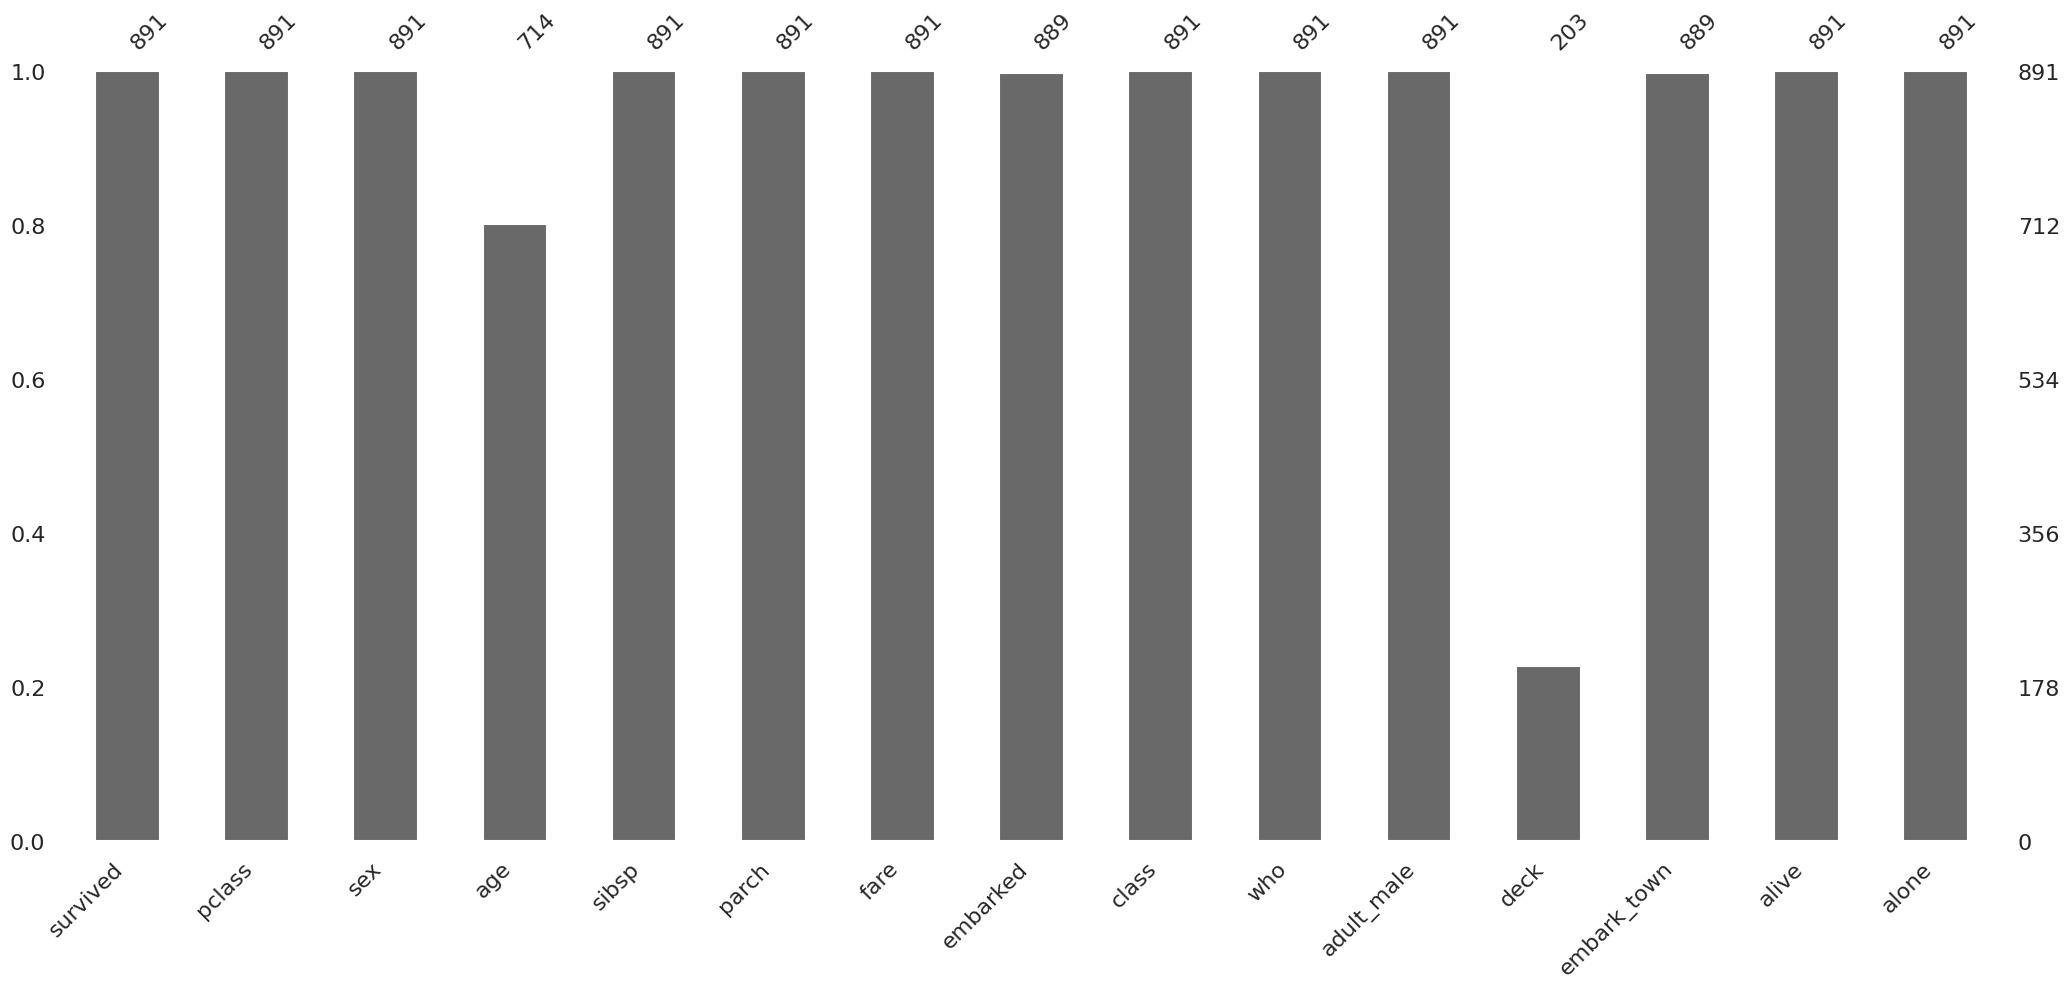

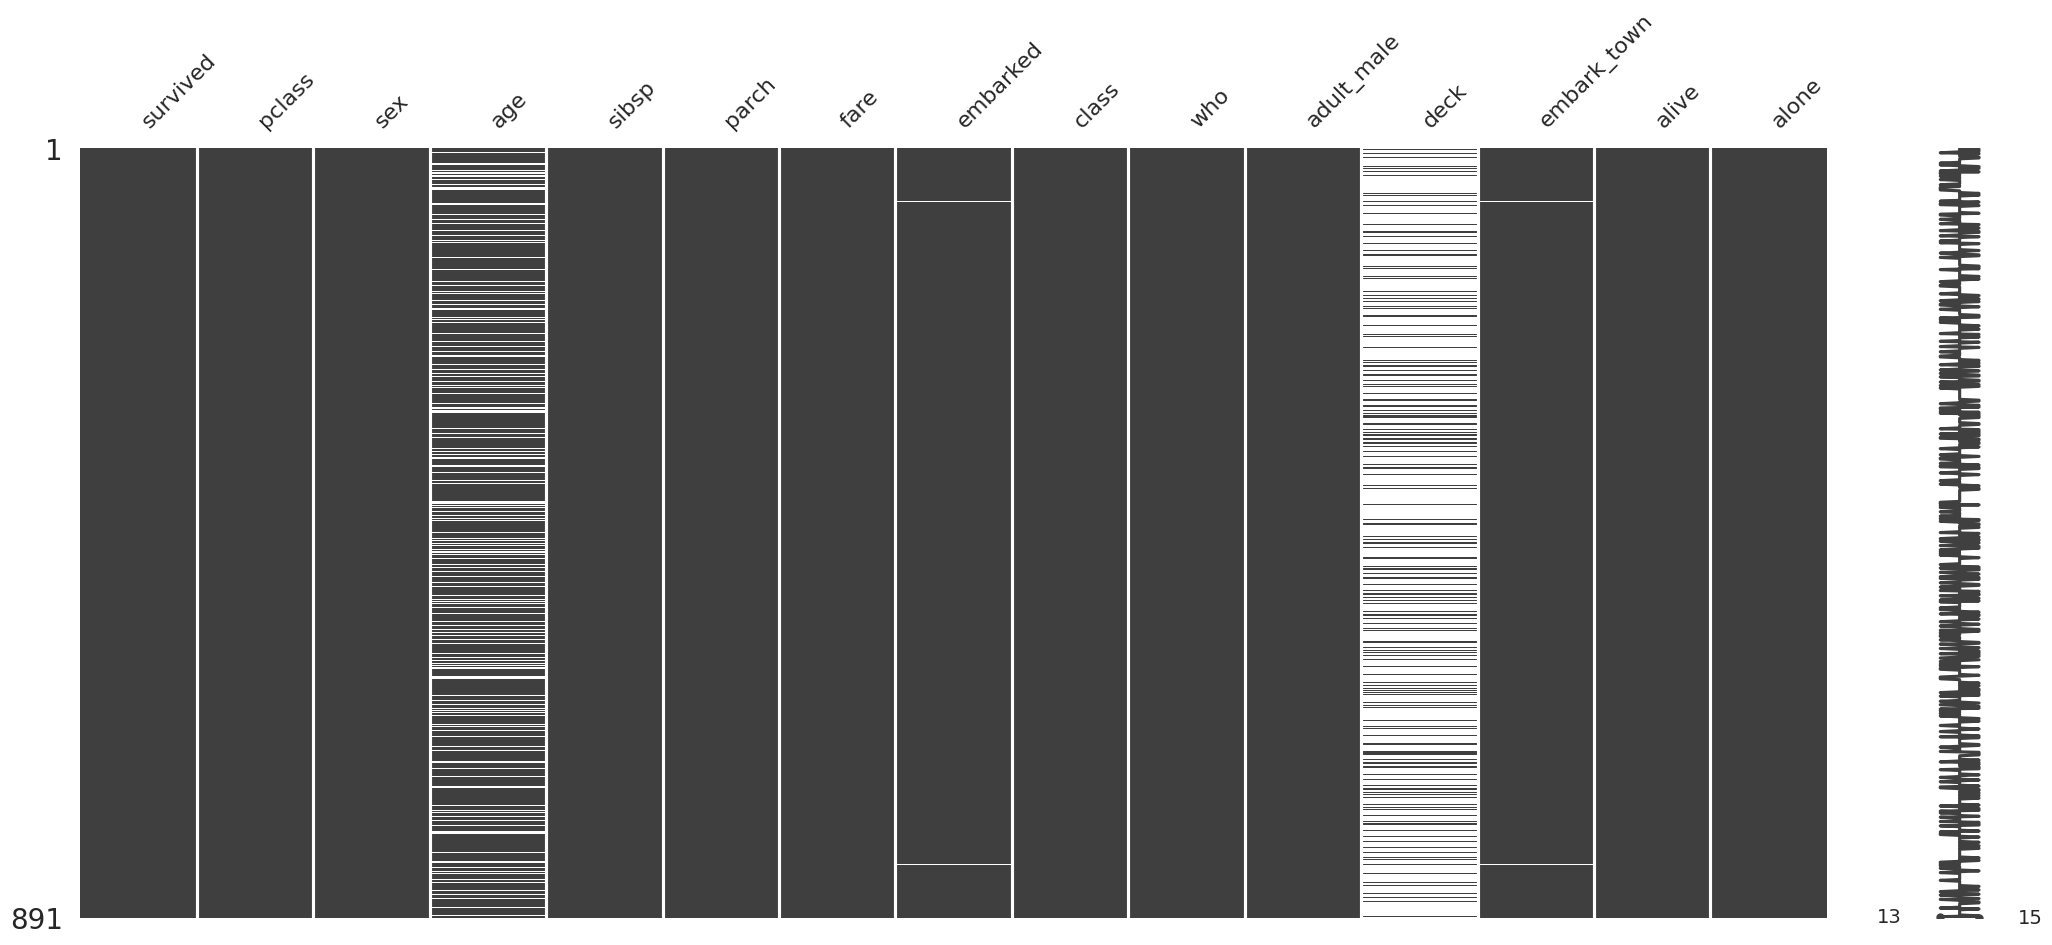

In [ ]:
#using missigno


msno.bar(df)
(msno.matrix(df));

In [ ]:
# lines with at least one missing value:

df[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
#lines without a value in the field 'embarked'

df[df.embarked.isna()]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


## Removing values

In [ ]:
df.drop(columns=['deck'])

# removing deck due general missing values


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
max_nam_freq = .7
na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols[na_cols>max_nam_freq].index

# so, another way to do the previous step by automatization is to establish a floor value
# we can find out index which missing values is larger than what we proposed as a floor value



In [ ]:
df.drop(columns = cols2drop, inplace = True) #so, we can alter out dataframe permanently


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


Inputing null values

In [ ]:
df.fillna({'age': df.age.mean(),  'embarked': df.embarked.mode()[0]}).tail()
#mode returns a list of values, therefore, it's required to select the first number of the mode

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [ ]:
(df.assign(

          age_bfill = df.age.bfill(),
          age_ffill = df.age.ffill(),
          age_interpolate = df.age.interpolate()


)).filter(like='age').tail(20).style.highlight_null('green')

,age,age_bfill,age_ffill,age_interpolate
871,47.000000,47.000000,47.000000,47.000000
872,33.000000,33.000000,33.000000,33.000000
873,47.000000,47.000000,47.000000,47.000000
874,28.000000,28.000000,28.000000,28.000000
875,15.000000,15.000000,15.000000,15.000000
876,20.000000,20.000000,20.000000,20.000000
877,19.000000,19.000000,19.000000,19.000000
878,nan,56.000000,19.000000,37.500000
879,56.000000,56.000000,56.000000,56.000000
880,25.000000,25.000000,25.000000,25.000000


In [ ]:
#input Null values per group

df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-30-d3fcae842645>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64